## Import libraries

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats
from scipy.stats import shapiro
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 8)

## Load the dataset

In [238]:
df = pd.read_csv('./../../Datasets/HousePrices.csv')
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Analysis and processing

#### Shape of dataset

In [239]:
df.shape

(2073, 81)

In [240]:
df.dtypes

Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
Road_Type               object
Alley                   object
Property_Shape          object
LandContour             object
Utilities               object
LotConfig               object
LandSlope               object
Neighborhood            object
Condition1              object
Condition2              object
Dwelling_Type           object
HouseStyle              object
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
RoofStyle               object
RoofMatl                object
Exterior1st             object
Exterior2nd             object
MasVnrType              object
MasVnrArea             float64
ExterQual               object
ExterCond               object
Foundation              object
BsmtQual                object
BsmtCond                object
BsmtExpo

In [241]:
df['Dwell_Type'].unique()

array([  60,   20,   70,   50,  190,   45,   90,  120,   30,   85,   80,
        160,   75,  180,   40,  150,  303, 7080], dtype=int64)

In [242]:
df['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [243]:
df['OverallCond'].unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1], dtype=int64)

#### Dwell_Type , OverallQual , OverallCond - Looking like a categorical data but it was defined as numerical. So we change it to categorical type.

In [244]:
df[['Dwell_Type','OverallQual','OverallCond']] = df[['Dwell_Type','OverallQual','OverallCond']].astype(object)

#### Drop ID column

In [245]:
df.drop('Id',axis=1,inplace=True)

#### Descriptive analysis

In [246]:
df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,1753.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,1960.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,72.056475,10717.853353,1969.445731,1986.617463,101.875668,437.949349,49.219489,565.101302,1052.270140,1166.096961,344.745779,6.168355,1517.011095,0.429329,0.056440,1.571635,0.378678,2.874096,1.052581,6.540280,0.602026,1980.418367,1.775687,474.683068,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,27.987475,9215.982306,30.222647,20.432694,179.169217,448.051119,165.621465,449.730940,431.026436,376.975119,438.844748,49.553967,517.236428,0.522605,0.237015,0.545963,0.499873,0.816144,0.237901,1.629673,0.633931,24.158327,0.741976,212.284955,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7620.000000,1950.000000,1970.000000,0.000000,0.000000,0.000000,208.000000,794.000000,894.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1963.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,70.000000,9492.000000,1971.000000,1995.000000,0.000000,381.000000,0.000000,466.000000,990.000000,1095.000000,0.000000,0.000000,1470.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,83.000000,11601.000000,1999.000000,2004.000000,161.500000,708.000000,0.000000,804.000000,1291.000000,1391.000000,730.000000,0.000000,1792.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2023.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2019.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Randomly checking some columns

In [247]:
df['PoolArea'].describe()

count    2073.000000
mean        2.299083
std        37.411031
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

In [248]:
df['LotFrontage'].describe()

count    1753.000000
mean       72.056475
std        27.987475
min        21.000000
25%        60.000000
50%        70.000000
75%        83.000000
max       313.000000
Name: LotFrontage, dtype: float64

#### Descriptive analysis only for categorical columns

In [249]:
df.select_dtypes(include='object').describe(include='all')

,Dwell_Type,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2073,2073,2073,129,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2059,2073,2073,2073,2014,2014,2012,2014,2013,2073,2073,2073,2072,2073,2073,1085,1960,1960,1960,1960,2073,8,404,80,2073,2073
unique,18,5,2,2,4,4,2,5,3,25,9,8,5,8,10,9,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,722,1611,2063,72,1300,1854,2070,1481,1958,317,1794,2054,1719,1036,508,943,1606,2036,750,729,1233,1272,1815,928,904,1851,1349,604,1770,2025,1045,1935,1901,1043,1937,530,1252,857,1870,1885,1913,4,233,74,1797,1695


#### By seeing both descriptive analysis, PoolQC and PoolArea have only 8 non-null values

In [250]:
df['PoolQC'].value_counts(dropna=False)

NaN    2065
Gd        4
Ex        2
Fa        2
Name: PoolQC, dtype: int64

In [251]:
df['PoolArea'].value_counts(dropna=False)

0      2065
738       2
512       1
648       1
576       1
555       1
480       1
519       1
Name: PoolArea, dtype: int64

#### Droping PoolQC and PoolArea columns

In [252]:
df.drop(['PoolQC','PoolArea'],axis=1,inplace=True)

#### New shape of our dataframe

In [253]:
df.shape

(2073, 78)

#### Select only numerical columns and store it in df_numeric_features

In [254]:
df_numeric_features = df.select_dtypes(exclude='object').columns
df_numeric_features

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

In [255]:
len(df_numeric_features)

33

#### Select only categorical columns and store it in df_categorical_features

In [256]:
df_categorical_features = df.select_dtypes(include='object').columns
df_categorical_features

Index(['Dwell_Type', 'Zone_Class', 'Road_Type', 'Alley', 'Property_Shape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [257]:
len(df_categorical_features)

45

#### Histogram

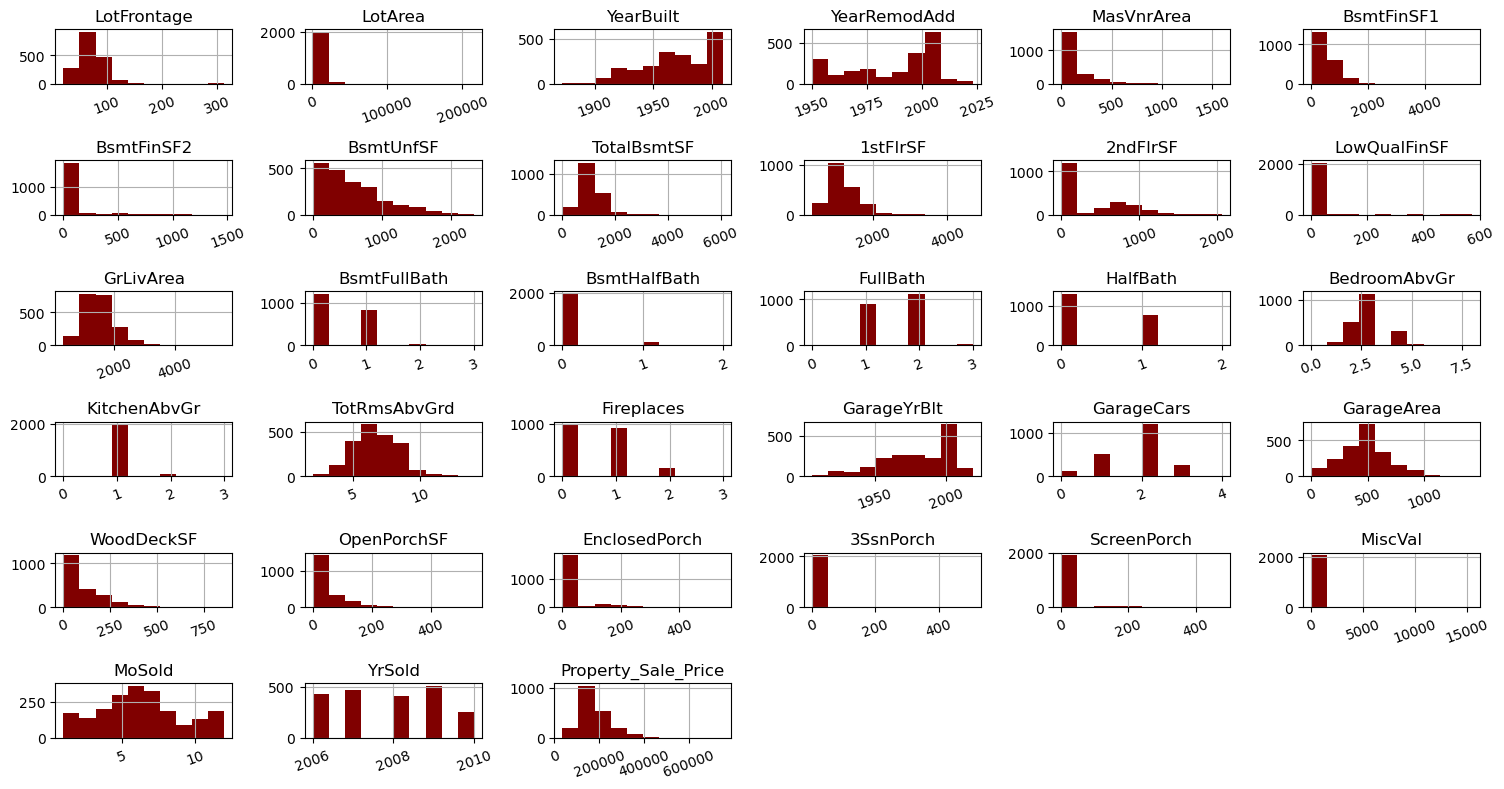

In [258]:
df.hist(color='maroon',xrot=20)
plt.tight_layout() #to adjust the subplots
plt.show()

#### Visualize the target variable

Text(0.5, 1.0, 'Histogram of Property_Sale_Price')

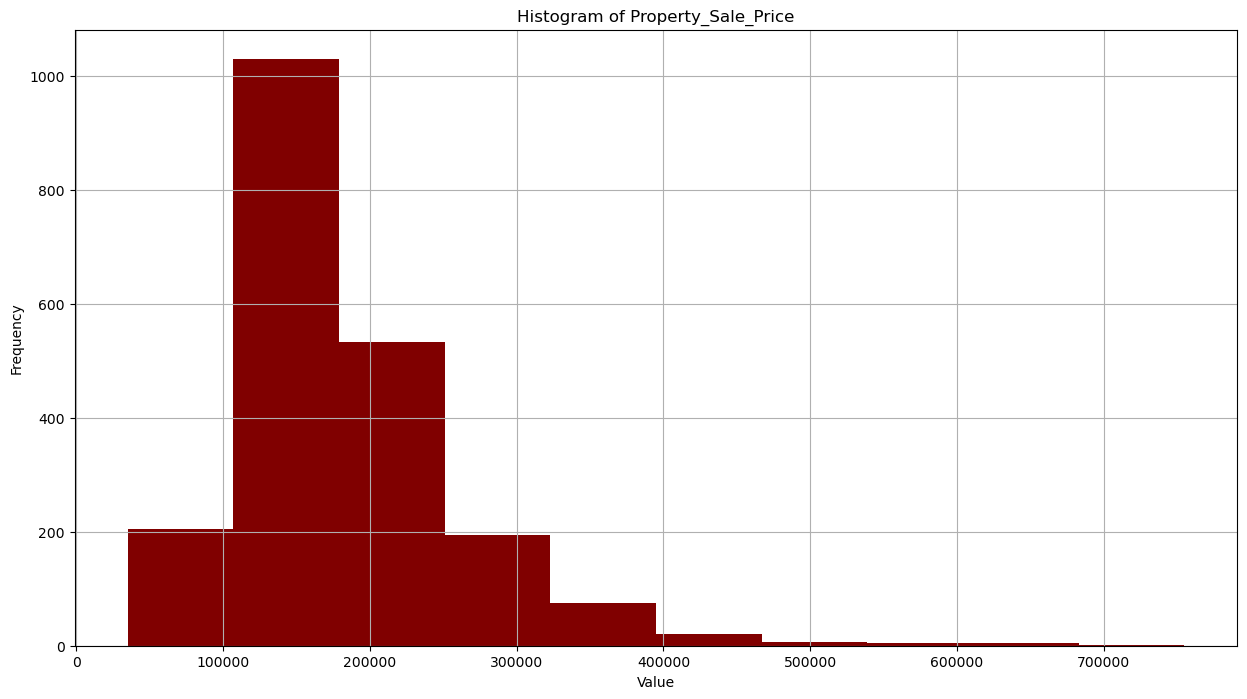

In [259]:
df['Property_Sale_Price'].hist(color='maroon')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Property_Sale_Price')

Text(0.5, 1.0, 'Histogram of Property_Sale_Price')

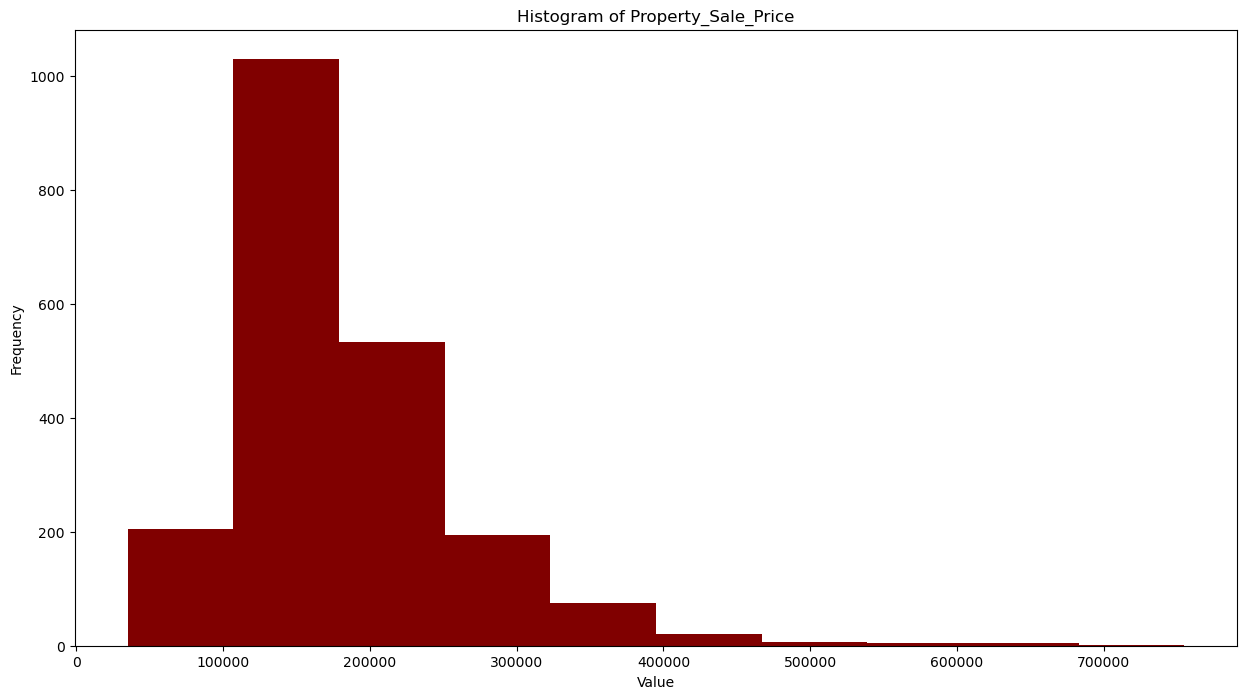

In [260]:
#without grid
plt.hist(df['Property_Sale_Price'],color='maroon')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Property_Sale_Price')

#### It is skewed. It is not normally distributed

#### Boxplot for OverallQC with Saleprice

<Axes: xlabel='OverallQual', ylabel='Property_Sale_Price'>

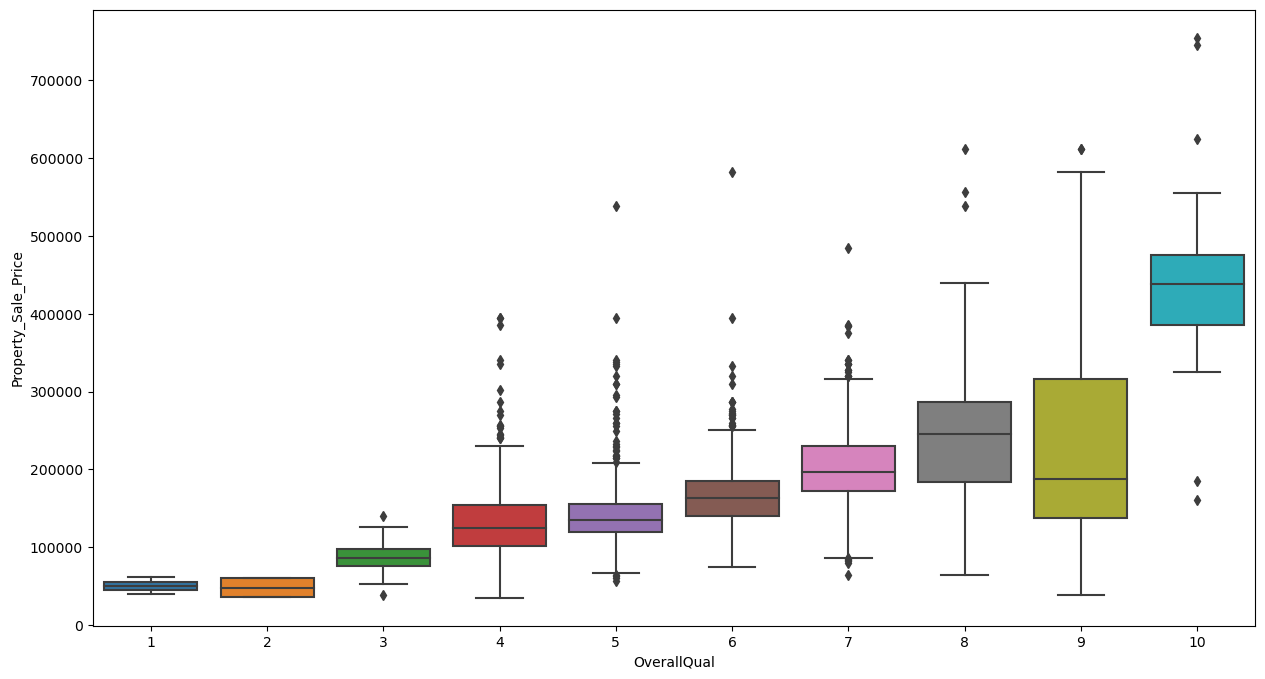

In [261]:
sns.boxplot(df,x='OverallQual',y='Property_Sale_Price')

#### Inference - Sale Prices increases as Overall Quality Increases

#### Boxplot for OverallCond with Saleprice

<Axes: xlabel='OverallCond', ylabel='Property_Sale_Price'>

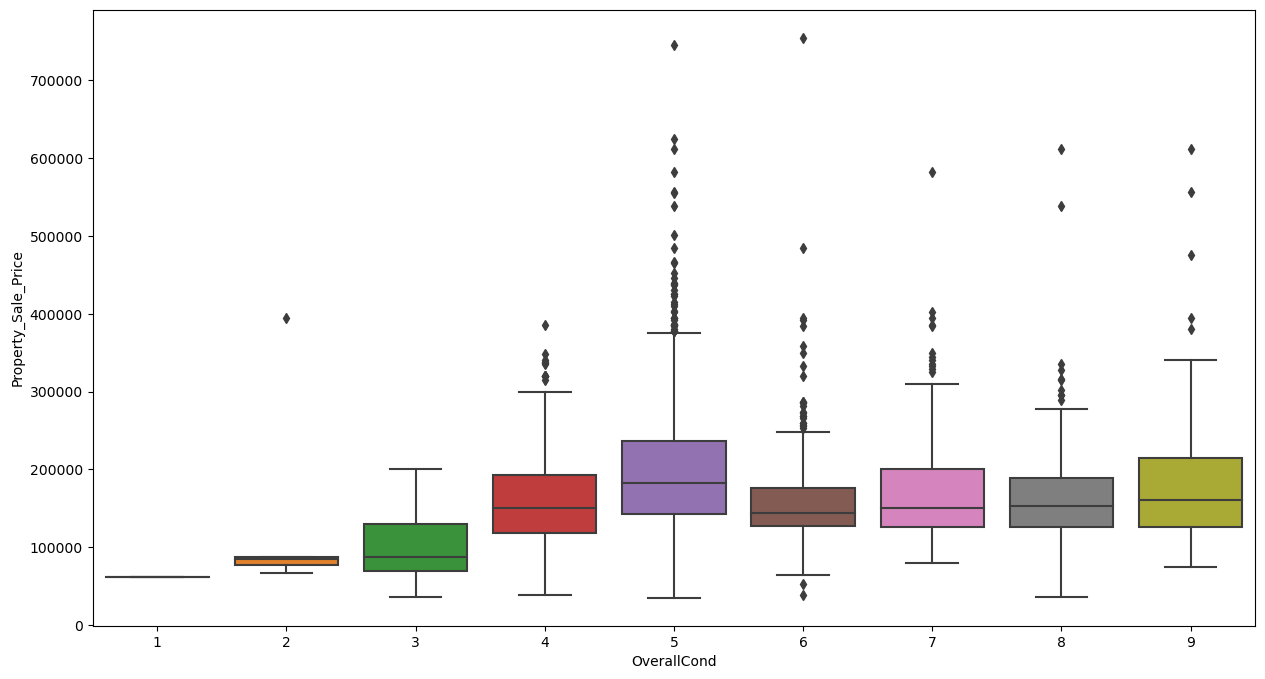

In [262]:
sns.boxplot(df,x='OverallCond',y='Property_Sale_Price')

#### Pairplot

In [263]:
''' cols = ['Property_Sale_Price' ,'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearRemodAdd','YearBuilt', 'GrLivArea']
sns.set_palette("tab10")  # Using 'tab10' seaborn color palette, you can choose other palettes as well
sns.pairplot(df[cols], plot_kws={'color': 'maroon'})
plt.show()
'''

' cols = [\'Property_Sale_Price\' ,\'GarageCars\', \'TotalBsmtSF\', \'FullBath\', \'YearRemodAdd\',\'YearBuilt\', \'GrLivArea\']\nsns.set_palette("tab10")  # Using \'tab10\' seaborn color palette, you can choose other palettes as well\nsns.pairplot(df[cols], plot_kws={\'color\': \'maroon\'})\nplt.show()\n'

#### Boxplot for target variable

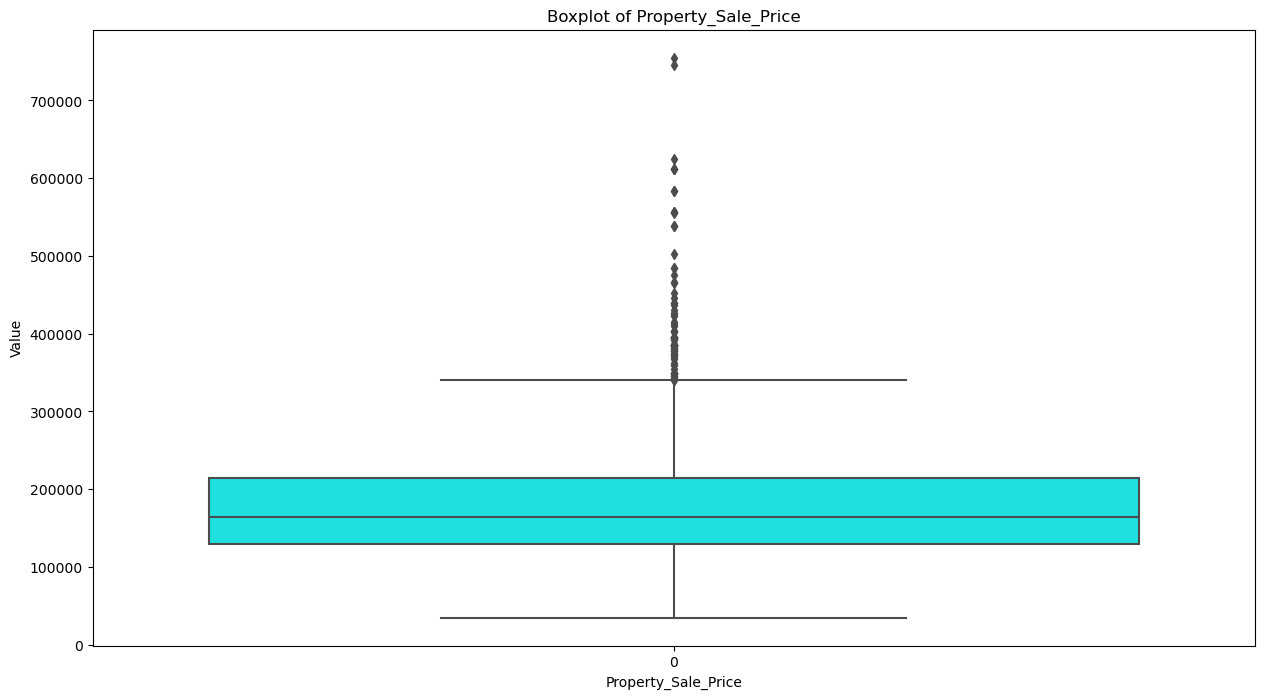

In [264]:
sns.boxplot(df['Property_Sale_Price'],color='cyan')
plt.xlabel('Property_Sale_Price')
plt.ylabel('Value')
plt.title('Boxplot of Property_Sale_Price')
plt.show()

#### Get only data where Property Sales Price is less than 500000

In [265]:
df_property = df[df['Property_Sale_Price']<500000]

In [266]:
df_property.shape

(2059, 78)

#### Missing values

In [267]:
df_property.isnull().sum().sort_values(ascending=False)

MiscFeature            1979
Alley                  1930
Fence                  1656
FireplaceQu             988
LotFrontage             320
GarageType              113
GarageFinish            113
GarageQual              113
GarageCond              113
GarageYrBlt             113
BsmtExposure             61
BsmtFinType2             60
BsmtCond                 59
BsmtFinType1             59
BsmtQual                 59
MasVnrArea               14
MasVnrType               14
Electrical                1
HalfBath                  0
BsmtFullBath              0
BsmtHalfBath              0
BedroomAbvGr              0
FullBath                  0
TotRmsAbvGrd              0
Functional                0
KitchenAbvGr              0
KitchenQual               0
Dwell_Type                0
Fireplaces                0
LowQualFinSF              0
GarageCars                0
GarageArea                0
PavedDrive                0
WoodDeckSF                0
OpenPorchSF               0
EnclosedPorch       

In [268]:
missing_values_count = df_property.isnull().sum()
total_rows = len(df_property)
percentage_missing_values = (missing_values_count / total_rows) * 100
percentage_missing_values.sort_values(ascending=False)

MiscFeature            96.114619
Alley                  93.734823
Fence                  80.427392
FireplaceQu            47.984458
LotFrontage            15.541525
GarageType              5.488101
GarageFinish            5.488101
GarageQual              5.488101
GarageCond              5.488101
GarageYrBlt             5.488101
BsmtExposure            2.962603
BsmtFinType2            2.914036
BsmtCond                2.865469
BsmtFinType1            2.865469
BsmtQual                2.865469
MasVnrArea              0.679942
MasVnrType              0.679942
Electrical              0.048567
HalfBath                0.000000
BsmtFullBath            0.000000
BsmtHalfBath            0.000000
BedroomAbvGr            0.000000
FullBath                0.000000
TotRmsAbvGrd            0.000000
Functional              0.000000
KitchenAbvGr            0.000000
KitchenQual             0.000000
Dwell_Type              0.000000
Fireplaces              0.000000
LowQualFinSF            0.000000
GarageCars

In [269]:
missing_df = pd.DataFrame({
    'Total Nulls': missing_values_count.values,
    'Percentage of Missing Values': percentage_missing_values.values,
    'Data Types': df_property.dtypes
})

missing_df = missing_df.sort_values(by='Percentage of Missing Values', ascending=False)

missing_df

,Total Nulls,Percentage of Missing Values,Data Types
MiscFeature,1979,96.114619,object
Alley,1930,93.734823,object
Fence,1656,80.427392,object
FireplaceQu,988,47.984458,object
LotFrontage,320,15.541525,float64
GarageType,113,5.488101,object
GarageFinish,113,5.488101,object
GarageQual,113,5.488101,object
GarageCond,113,5.488101,object
GarageYrBlt,113,5.488101,float64


In [270]:
missing_df.shape

(78, 3)

In [271]:
missing_df[(missing_df['Total Nulls'] > 0) & (missing_df['Data Types'] != 'object')]

,Total Nulls,Percentage of Missing Values,Data Types
LotFrontage,320,15.541525,float64
GarageYrBlt,113,5.488101,float64
MasVnrArea,14,0.679942,float64


In [272]:
df_property['LotFrontage'] = df_property['LotFrontage'].fillna(df_property['LotFrontage'].median())
df_property['MasVnrArea'] = df_property['MasVnrArea'].fillna(df_property['MasVnrArea'].median())
df_property['GarageYrBlt'] = df_property['GarageYrBlt'].fillna(0)

In [273]:
missing_df[(missing_df['Total Nulls'] > 0) & (missing_df['Data Types'] == 'object')]

,Total Nulls,Percentage of Missing Values,Data Types
MiscFeature,1979,96.114619,object
Alley,1930,93.734823,object
Fence,1656,80.427392,object
FireplaceQu,988,47.984458,object
GarageType,113,5.488101,object
GarageFinish,113,5.488101,object
GarageQual,113,5.488101,object
GarageCond,113,5.488101,object
BsmtExposure,61,2.962603,object
BsmtFinType2,60,2.914036,object


In [274]:
df_property['MiscFeature'] = df_property['MiscFeature'].fillna('None')
df_property['Alley'] = df_property['Alley'].fillna('None')
df_property['Fence'] = df_property['Fence'].fillna('None')
df_property['FireplaceQu'] = df_property['FireplaceQu'].fillna('None')
df_property['MasVnrType'] = df_property['MasVnrType'].fillna('None')

In [275]:
df_property['GarageType'] = df_property['GarageType'].fillna('No Garage')
df_property['GarageFinish'] = df_property['GarageFinish'].fillna('No Garage')
df_property['GarageQual'] = df_property['GarageQual'].fillna('No Garage')
df_property['GarageCond'] = df_property['GarageCond'].fillna('No Garage')

In [276]:
df_property['BsmtExposure'] = df_property['BsmtExposure'].fillna('No Basement')
df_property['BsmtFinType2'] = df_property['BsmtFinType2'].fillna('No Basement')
df_property['BsmtCond'] = df_property['BsmtCond'].fillna('No Basement')
df_property['BsmtQual'] = df_property['BsmtQual'].fillna('No Basement')
df_property['BsmtFinType1'] = df_property['BsmtFinType1'].fillna('No Basement')

In [277]:
df_property['Electrical'] = df_property['Electrical'].fillna(df_property['Electrical'].mode()[0])

#### Correlation

In [278]:
df_property.corr()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price
LotFrontage,1.000000,0.238191,0.081517,0.092211,0.111412,0.118122,0.055937,0.105129,0.256237,0.318458,0.054620,0.024525,0.284689,0.078472,-0.036578,0.153532,0.036507,0.207026,0.009171,0.264457,0.193244,0.081887,0.216162,0.248652,0.073232,0.092217,0.000492,0.037425,0.018689,-0.003469,0.028949,0.024222,0.259284
LotArea,0.238191,1.000000,-0.017109,0.013312,0.041665,0.157255,0.077684,-0.000161,0.193753,0.239459,0.023070,-0.000437,0.196624,0.123539,0.031117,0.085524,-0.002532,0.103089,-0.007048,0.143813,0.208337,0.064729,0.120713,0.137110,0.112262,0.063370,-0.021205,0.011367,0.027271,0.031767,0.000059,-0.008380,0.201837
YearBuilt,0.081517,-0.017109,1.000000,0.534846,0.258605,0.200397,-0.027750,0.117984,0.322489,0.225896,0.011759,-0.180594,0.158950,0.139671,-0.018345,0.398912,0.191748,-0.057029,-0.143052,0.069192,0.127941,0.219338,0.453642,0.404166,0.182813,0.178019,-0.321816,0.034844,-0.050894,-0.038275,0.031601,-0.007701,0.456523
YearRemodAdd,0.092211,0.013312,0.534846,1.000000,0.153766,0.092169,-0.074160,0.197311,0.275945,0.214706,0.133300,-0.084622,0.265337,0.099852,-0.011554,0.419381,0.176598,-0.038715,-0.127357,0.161845,0.099378,0.111173,0.387912,0.329864,0.182945,0.218917,-0.176180,0.040749,-0.044323,-0.011217,0.038320,0.055504,0.497005
MasVnrArea,0.111412,0.041665,0.258605,0.153766,1.000000,0.203449,-0.077174,0.128413,0.317306,0.289921,0.175364,-0.071076,0.358569,0.065543,0.020719,0.257621,0.192465,0.103158,-0.052282,0.244016,0.263473,0.131745,0.340641,0.342405,0.113509,0.136036,-0.094168,0.033596,0.054797,-0.034648,-0.006236,0.011242,0.438844
BsmtFinSF1,0.118122,0.157255,0.200397,0.092169,0.203449,1.000000,-0.063139,-0.514643,0.468375,0.377574,-0.144388,-0.071639,0.146652,0.641491,0.080676,0.022725,0.003940,-0.129599,-0.089633,-0.022325,0.202566,0.093347,0.179226,0.244935,0.208102,0.108858,-0.086769,0.047758,0.042606,-0.000288,-0.011921,0.019093,0.342365
BsmtFinSF2,0.055937,0.077684,-0.027750,-0.074160,-0.077174,-0.063139,1.000000,-0.207872,0.106746,0.095781,-0.115530,-0.003752,-0.029608,0.170270,0.068032,-0.093610,-0.044307,-0.017684,-0.043336,-0.048209,0.039138,0.046382,-0.042634,-0.019151,0.076978,-0.001180,0.058115,-0.030464,0.098692,-0.002251,-0.016672,0.025224,-0.028908
BsmtUnfSF,0.105129,-0.000161,0.117984,0.197311,0.128413,-0.514643,-0.207872,1.000000,0.444357,0.329430,-0.002545,0.032617,0.244148,-0.412720,-0.111400,0.291071,-0.046310,0.154499,0.014057,0.247856,0.077578,0.045420,0.225198,0.197519,-0.005751,0.141691,-0.010603,0.009747,-0.013646,-0.019743,0.044928,-0.048135,0.243283
TotalBsmtSF,0.256237,0.193753,0.322489,0.275945,0.317306,0.468375,0.106746,0.444357,1.000000,0.779426,-0.198123,-0.041315,0.399745,0.295662,-0.007614,0.295603,-0.062438,0.022277,-0.095253,0.220785,0.308159,0.163401,0.408374,0.456518,0.240381,0.262956,-0.078579,0.047997,0.068569,-0.022127,0.028723,-0.021312,0.602471
1stFlrSF,0.318458,0.239459,0.225896,0.214706,0.289921,0.377574,0.095781,0.329430,0.779426,1.000000,-0.240017,-0.020983,0.528308,0.222190,-0.010812,0.354512,-0.153219,0.113136,0.068935,0.372284,0.381998,0.163309,0.419084,0.462783,0.240294,0.216539,-0.049631,0.064372,0.074862,-0.027565,0.048724,-0.003292,0.581605


#### Heatmap

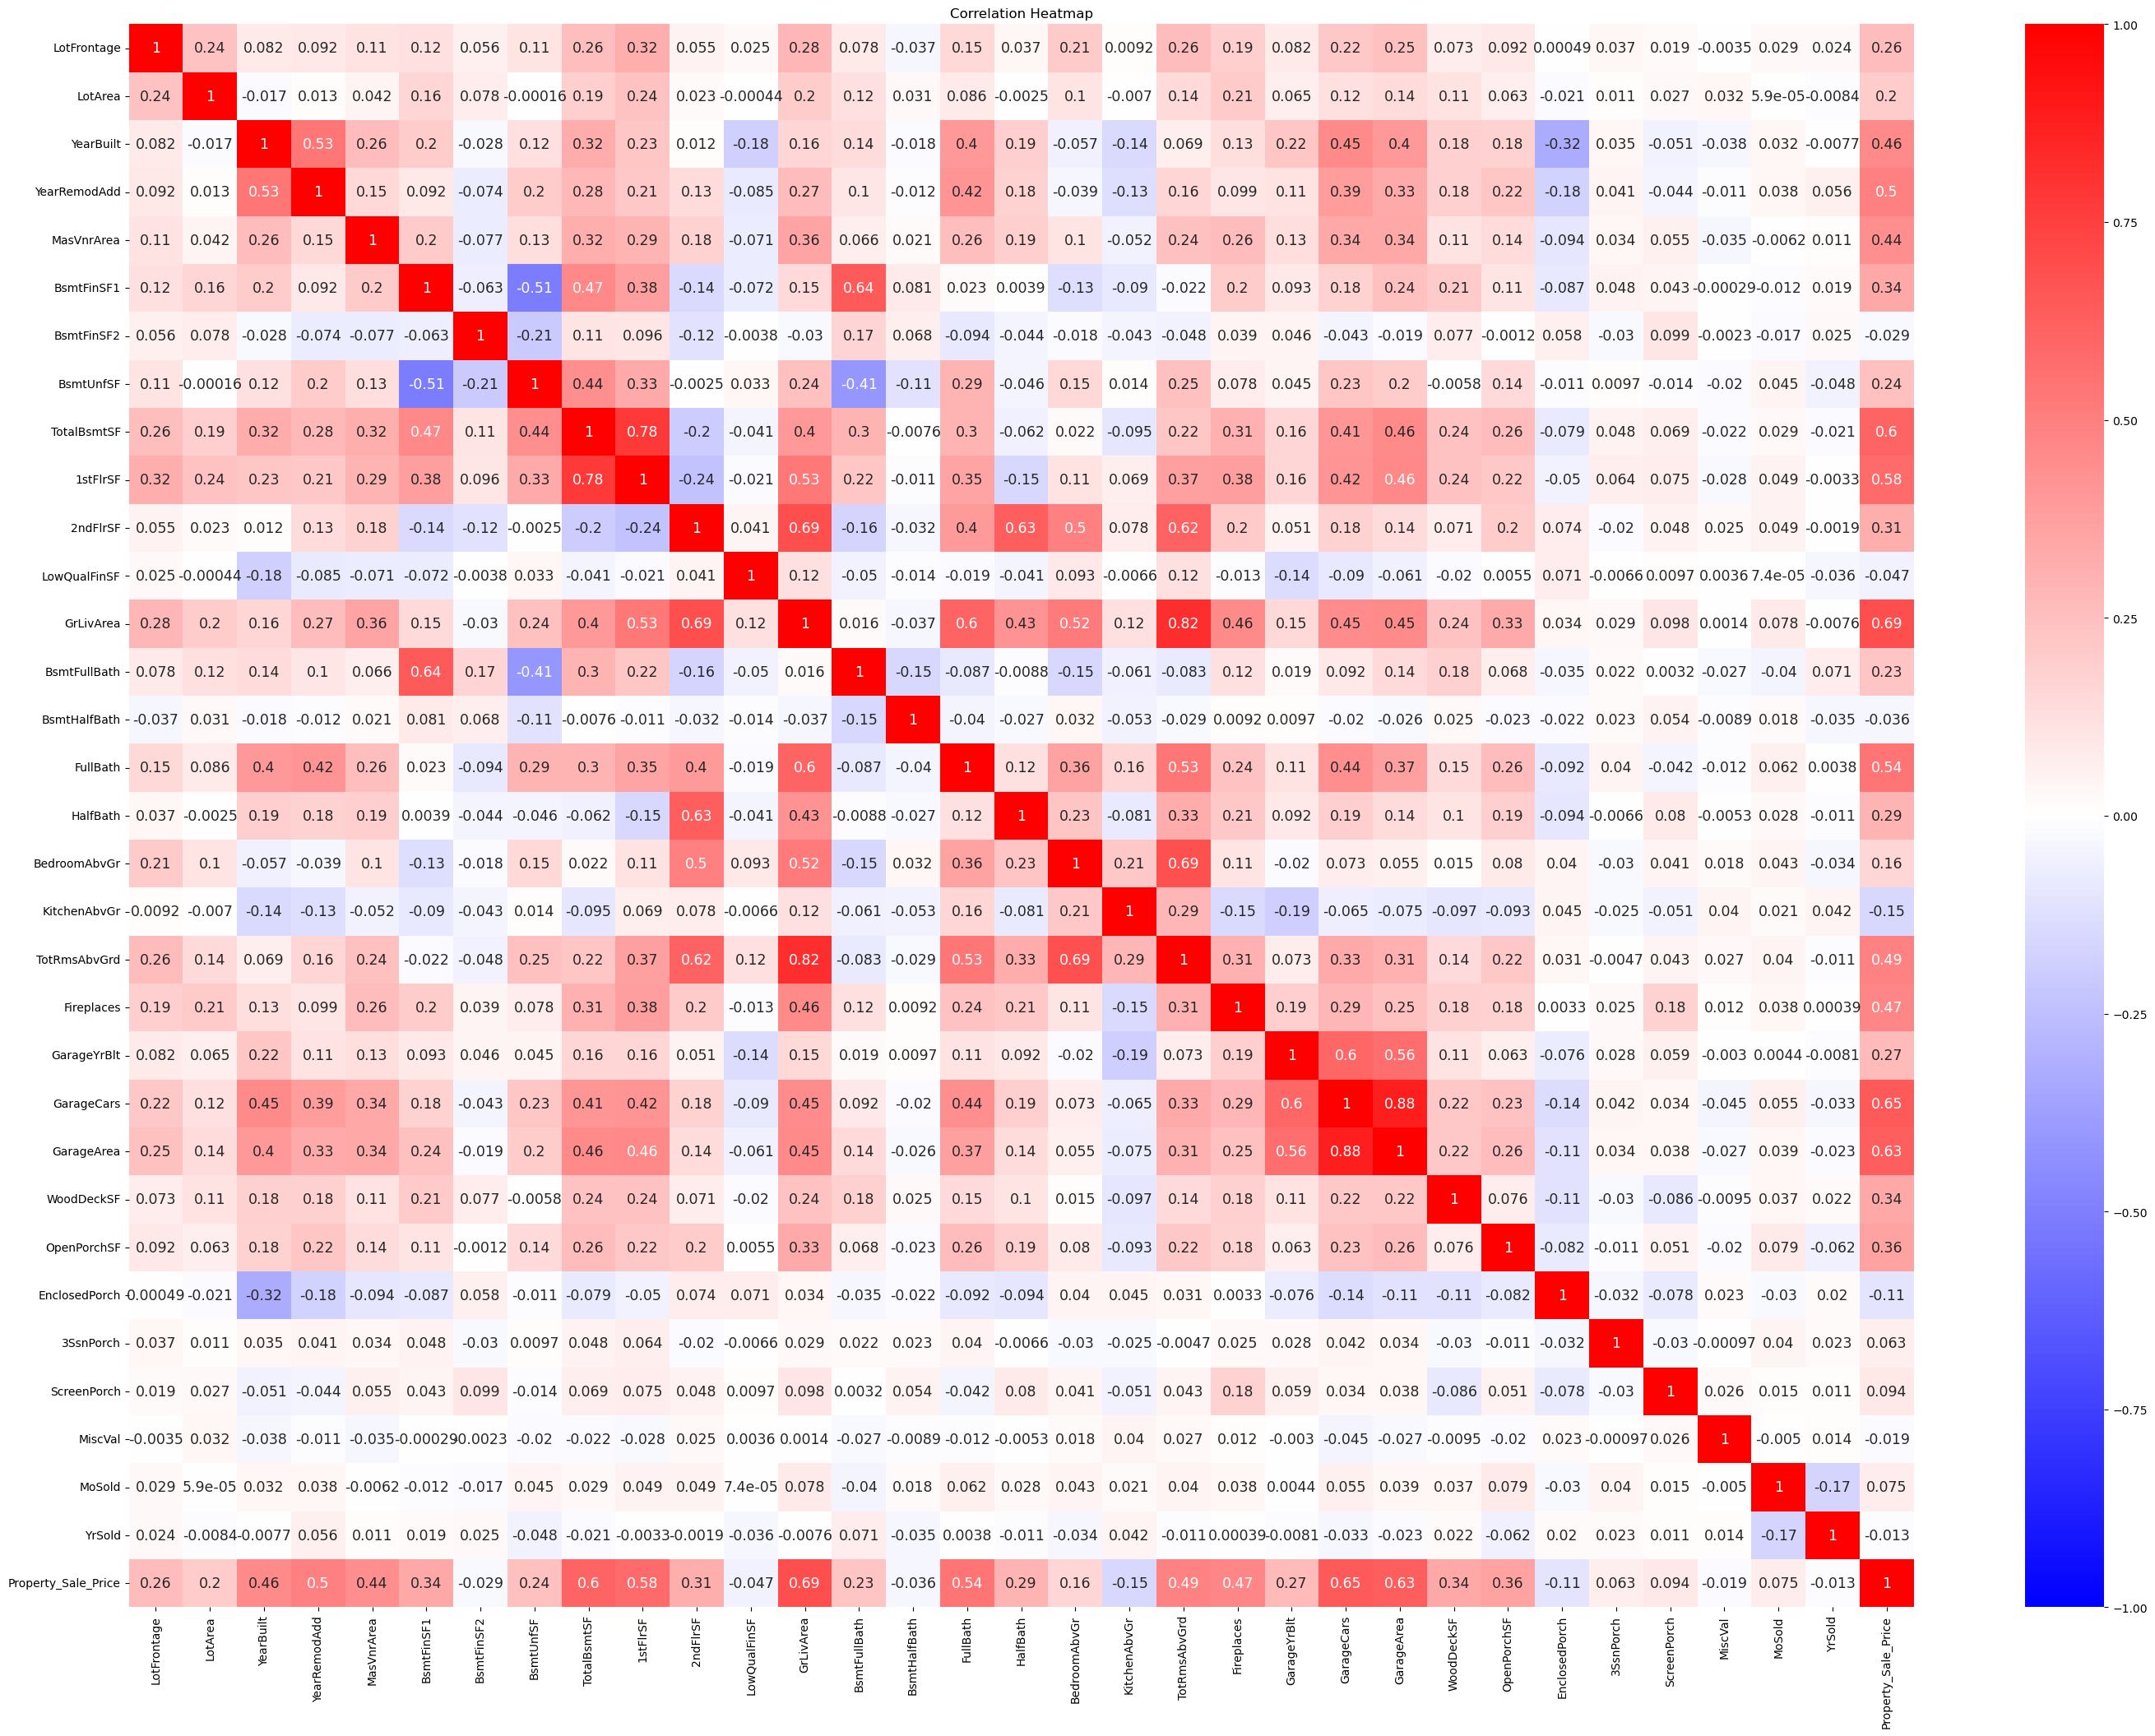

In [279]:
plt.figure(figsize=(35,25))
sns.heatmap(df_property.corr(),annot=True, cmap='bwr',vmax=1.0,vmin=-1.0,annot_kws={'size':12.5})
plt.title('Correlation Heatmap')
plt.show()

#### Shapiro Wilk Test - To check normality of data 

The Shapiro-Wilk test is a statistical test used to assess whether a given dataset follows a normal distribution or not. It tests the null hypothesis that the data is normally distributed against the alternative hypothesis that the data is not normally distributed.

- Null Hypothesis (H0): The data follows a normal distribution.
- Alternative Hypothesis (Ha): The data does not follow a normal distribution.

- Decision:

  - If p-value > alpha: Fail to reject H0 (Data follows a normal distribution).
  - If p-value <= alpha: Reject H0 (Data does not follow a normal distribution).

In [280]:
statistic, p_value = shapiro(df_property['Property_Sale_Price'])

alpha = 0.05

if p_value > alpha:
    print("The 'Property_Sale_Price' column follows a normal distribution "
          "(fail to reject the null hypothesis).")
else:
    print("The 'Property_Sale_Price' column does not follow a normal distribution "
          "(reject the null hypothesis).")

The 'Property_Sale_Price' column does not follow a normal distribution (reject the null hypothesis).


#### Data transformation - to make target varible distribution as normal

In [281]:
df_property['Property_Sale_Price'].skew()

1.1480842340500854

In [282]:
df_property['log_Property_Sale_Price'] = df_property['Property_Sale_Price'].apply(lambda x: np.log(x))

In [283]:
df_property['log_Property_Sale_Price'].skew()

-0.10293032838737998

#### Inference - Before doing log transformation the skewness is 1.14 but after doing log transformation we get skewness -0.1 (slightly negatively skewed distribution)

#### Histogram to see after log transformation

<Axes: >

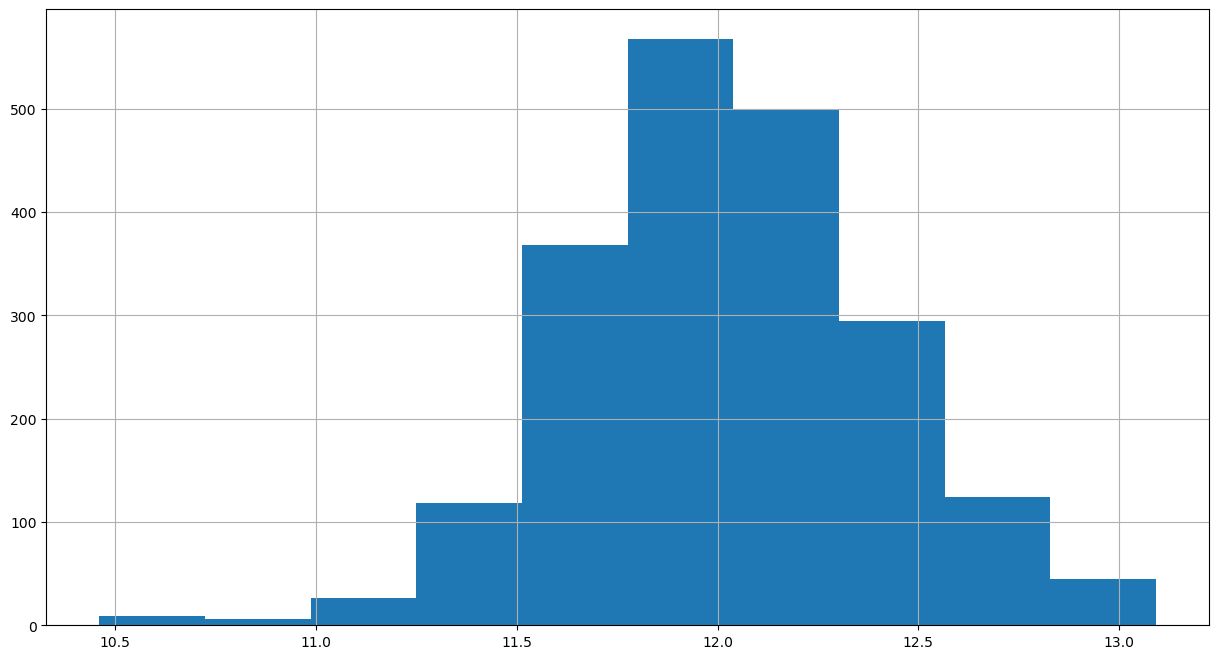

In [284]:
df_property['log_Property_Sale_Price'].hist()

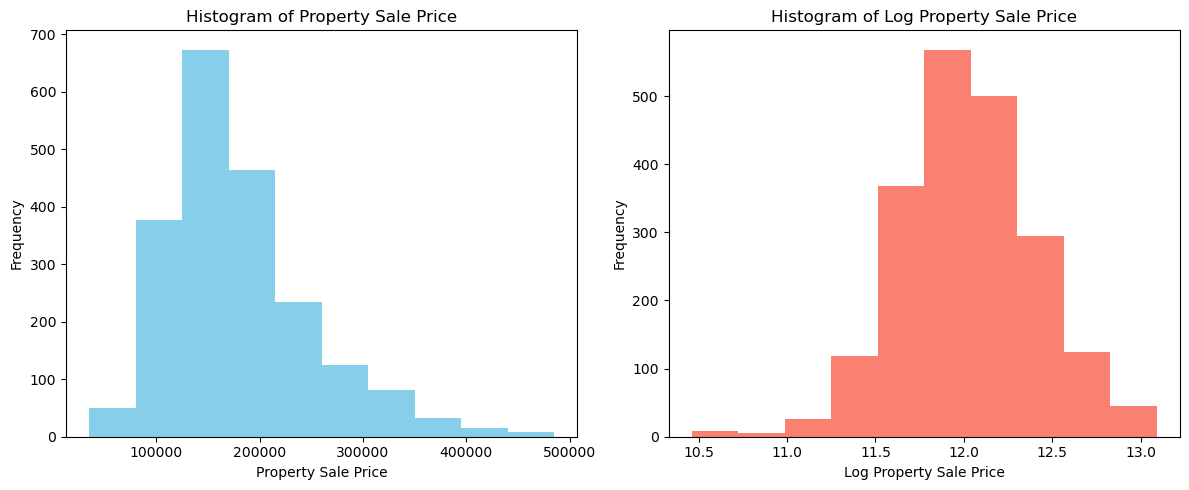

In [285]:
plt.figure(figsize=(12, 5))  

plt.subplot(1, 2, 1)
plt.hist(df_property['Property_Sale_Price'], color='skyblue')
plt.title('Histogram of Property Sale Price')
plt.xlabel('Property Sale Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_property['log_Property_Sale_Price'], color='salmon')
plt.title('Histogram of Log Property Sale Price')
plt.xlabel('Log Property Sale Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Shapiro Wilk test for log_Property_Sale_Price

In [286]:
statistic, p_value = shapiro(df_property['log_Property_Sale_Price'])

alpha = 0.05

if p_value > alpha:
    print("The 'log_Property_Sale_Price' column follows a normal distribution "
          "(fail to reject the null hypothesis).")
else:
    print("The 'log_Property_Sale_Price' column does not follow a normal distribution "
          "(reject the null hypothesis).")

The 'log_Property_Sale_Price' column does not follow a normal distribution (reject the null hypothesis).


#### Encoding categorical columns using one-hot encoding

In [287]:
df_property_encoded = pd.get_dummies(df_property,columns=df_categorical_features,drop_first=True)

#### After encoded shape of dataframe

In [288]:
df_property_encoded.shape

(2059, 288)

In [289]:
df_property_encoded.dtypes

LotFrontage                 float64
LotArea                       int64
YearBuilt                     int64
YearRemodAdd                  int64
MasVnrArea                  float64
BsmtFinSF1                    int64
BsmtFinSF2                    int64
BsmtUnfSF                     int64
TotalBsmtSF                   int64
1stFlrSF                      int64
2ndFlrSF                      int64
LowQualFinSF                  int64
GrLivArea                     int64
BsmtFullBath                  int64
BsmtHalfBath                  int64
FullBath                      int64
HalfBath                      int64
BedroomAbvGr                  int64
KitchenAbvGr                  int64
TotRmsAbvGrd                  int64
Fireplaces                    int64
GarageYrBlt                 float64
GarageCars                    int64
GarageArea                    int64
WoodDeckSF                    int64
OpenPorchSF                   int64
EnclosedPorch                 int64
3SsnPorch                   

## OLS 

#### Adding constant to dataframe because OLS is used to find only coefficients of independent variables. It will not return y-intercept.

In [290]:
df_property_encoded = sm.add_constant(df_property_encoded)

In [291]:
df_property_encoded.shape

(2059, 289)

In [299]:
X = df_property_encoded.drop(['Property_Sale_Price','log_Property_Sale_Price'],axis=1)
y = df_property_encoded['log_Property_Sale_Price']

In [300]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## Model building

In [315]:
model_train = sm.OLS(y_train,X_train).fit()

In [316]:
print(model_train.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.942
Model:                                 OLS   Adj. R-squared:                  0.929
Method:                      Least Squares   F-statistic:                     71.93
Date:                     Fri, 28 Jul 2023   Prob (F-statistic):               0.00
Time:                             12:48:53   Log-Likelihood:                 1377.6
No. Observations:                     1441   AIC:                            -2221.
Df Residuals:                         1174   BIC:                            -813.4
Df Model:                              266                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

#### Intercept of model

In [314]:
print(model.params['const'])

9.152078438398576


#### Condition number 5.59e-27 suggests that there is severe multicollinearity problem

- Condition number less than 100 - No multicollinearity
- Condition number between 100 and 1000 - Moderate multicollinearity
- Condition number greater than 1000 - Severe multicollinearity
- The condition number is a numerical measure used to assess the multicollinearity in a linear regression model. It is calculated based on the eigenvalues of the covariance matrix of the predictor variables. The condition number indicates how sensitive the model coefficients are to small changes in the data, particularly when there is multicollinearity among the predictor variables.

#### Durbin-Watson:  1.885 suggests there is no autocorrelation

- close to 2 - No autocorrelation  
- less than 2 - +ve autocorrelation
- more than 2 - -ve autocorrelation

- Durbin-Watson test is a statistical test used to detect the presence of autocorrelation in the residuals of a regression model.
- Durbin-Watson test statistic is denoted by "d" and takes values between 0 and 4
- A value of 2 indicates no significant autocorrelation, while values away from 2 suggest the presence of autocorrelation, either positive or negative. 

In [317]:
model_test = sm.OLS(y_test,X_test).fit()

In [318]:
print(model_test.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.974
Model:                                 OLS   Adj. R-squared:                  0.956
Method:                      Least Squares   F-statistic:                     53.43
Date:                     Fri, 28 Jul 2023   Prob (F-statistic):          2.80e-200
Time:                             12:49:13   Log-Likelihood:                 847.98
No. Observations:                      618   AIC:                            -1184.
Df Residuals:                          362   BIC:                            -50.78
Df Model:                              255                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [323]:
predictions = model_test.predict(sm.add_constant(X))

# Step 2: Calculate the residuals
residuals = df_property_encoded['log_Property_Sale_Price'] - predictions

# Step 3: Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))
print("RMSE:", rmse)

RMSE: 0.17902971048817856


In [324]:
# Get the predicted target values for the test set from the OLS model
y_pred_test = model_test.predict()

# Calculate the RMSE (Root Mean Squared Error)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Get the R-squared value for the test set from the OLS model
r_squared_test = model_test.rsquared

# Get the number of observations and the number of predictor variables for the test set
n_obs_test = len(y_test)
n_pred_test = X_test.shape[1]

# Calculate the adjusted R-squared value for the test set
adj_r_squared_test = 1 - ((1 - r_squared_test) * (n_obs_test - 1) / (n_obs_test - n_pred_test - 1))

# Calculate the MSE (Mean Squared Error) for the test set
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the results
print("RMSE for the test set:", rmse_test)
print("R-squared for the test set:", r_squared_test)
print("Adjusted R-squared for the test set:", adj_r_squared_test)
print("MSE for the test set:", mse_test)

RMSE for the test set: 0.06135530317077513
R-squared for the test set: 0.9741164505484827
Adjusted R-squared for the test set: 0.9516056060254965
MSE for the test set: 0.0037644732271777284
